# Cell2Structure - Data Exploration  
The dataset had been downloaded from the Broad Institutes [BBBC021 site](https://bbbc.broadinstitute.org/BBBC021) and pre-processed using various Python scripts availalbe in this project. In addition an enhanced version of the MoA file had been created by manually mapping compounds to MoA using the following sources:  
* [DrugBank](https://go.drugbank.com/)
* [PubChem](https://pubchem.ncbi.nlm.nih.gov/)
* [ChEMBL](https://www.ebi.ac.uk/chembl/)


In [41]:
import os
import tomlkit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw

In [42]:
final_dataset_dir = "../data/processed"

In [43]:
def load_project_conf(toml_file):
    with open(toml_file, "rb") as config_file:
        config = tomlkit.load(config_file)
    return config

In [44]:
project_config = load_project_conf("../project_config.toml")

In [45]:
df_bbbc021_original = pd.read_csv(os.path.join(final_dataset_dir, project_config["final_dataset"]["file_original"]))
df_bbbc021_enhanced = pd.read_csv(os.path.join(final_dataset_dir, project_config["final_dataset"]["file_enhanced"]))

In [46]:
df_bbbc021_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TableNumber                   13200 non-null  int64  
 1   ImageNumber                   13200 non-null  int64  
 2   Image_FileName_DAPI           13200 non-null  object 
 3   Image_PathName_DAPI           13200 non-null  object 
 4   Image_FileName_Tubulin        13200 non-null  object 
 5   Image_PathName_Tubulin        13200 non-null  object 
 6   Image_FileName_Actin          13200 non-null  object 
 7   Image_PathName_Actin          13200 non-null  object 
 8   Image_Metadata_Plate_DAPI     13200 non-null  object 
 9   Image_Metadata_Well_DAPI      13200 non-null  object 
 10  Replicate                     13200 non-null  int64  
 11  Image_Metadata_Compound       13200 non-null  object 
 12  Image_Metadata_Concentration  13200 non-null  float64
 13  I

In [47]:
df_bbbc021_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TableNumber                   13200 non-null  int64  
 1   ImageNumber                   13200 non-null  int64  
 2   Image_FileName_DAPI           13200 non-null  object 
 3   Image_PathName_DAPI           13200 non-null  object 
 4   Image_FileName_Tubulin        13200 non-null  object 
 5   Image_PathName_Tubulin        13200 non-null  object 
 6   Image_FileName_Actin          13200 non-null  object 
 7   Image_PathName_Actin          13200 non-null  object 
 8   Image_Metadata_Plate_DAPI     13200 non-null  object 
 9   Image_Metadata_Well_DAPI      13200 non-null  object 
 10  Replicate                     13200 non-null  int64  
 11  Image_Metadata_Compound       13200 non-null  object 
 12  Image_Metadata_Concentration  13200 non-null  float64
 13  I

In [48]:
original_moa_count = len(df_bbbc021_original["Image_Metadata_MoA"].unique())
enhanced_moa_count = len(df_bbbc021_enhanced["Image_Metadata_MoA"].unique())

print(f"Number of MoA in original dataset = {original_moa_count}")
print(f"Number of MoA in enhanced dataset = {enhanced_moa_count}")

Number of MoA in original dataset = 14
Number of MoA in enhanced dataset = 19


In [49]:
original_compound_moa = df_bbbc021_original[df_bbbc021_original["Image_Metadata_MoA"].notna()]["Image_Metadata_Compound"].unique()
enhanced_compound_moa = df_bbbc021_enhanced[df_bbbc021_enhanced["Image_Metadata_MoA"].notna()]["Image_Metadata_Compound"].unique()

print(f"Number of compounds mapped to an MoA in original dataset = {len(original_compound_moa)}")
print(f"Number of compounds mapped to an MoA in enhanced dataset = {len(enhanced_compound_moa)}")

Number of compounds mapped to an MoA in original dataset = 39
Number of compounds mapped to an MoA in enhanced dataset = 67


In [50]:
print("Compounds mapped to a MoA in the original dataset:\n"+
      "\n".join(np.sort(original_compound_moa)))

Compounds mapped to a MoA in the original dataset:
ALLN
AZ-A
AZ-C
AZ-J
AZ-U
AZ138
AZ258
AZ841
DMSO
MG-132
PD-169316
PP-2
alsterpaullone
anisomycin
bryostatin
camptothecin
chlorambucil
cisplatin
colchicine
cyclohexamide
cytochalasin B
cytochalasin D
demecolcine
docetaxel
emetine
epothilone B
etoposide
floxuridine
lactacystin
latrunculin B
methotrexate
mevinolin/lovastatin
mitomycin C
mitoxantrone
nocodazole
proteasome inhibitor I
simvastatin
taxol
vincristine


In [51]:
print("Compounds mapped to a MoA in the enhanced dataset:\n"+
      "\n".join(np.sort(enhanced_compound_moa)))

Compounds mapped to a MoA in the enhanced dataset:
5-fluorouracil
AG-1478
ALLN
AZ-A
AZ-C
AZ-J
AZ-U
AZ138
AZ235
AZ258
AZ841
Cdk1/2 inhibitor (NU6102)
DMSO
ICI-182,780
MG-132
PD-169316
PD-98059
PP-2
SB-202190
SP-600125
aloisine A
alsterpaullone
anisomycin
aphidicolin
arabinofuranosylcytosine
atropine
bleomycin
bohemine
bryostatin
camptothecin
carboplatin
chlorambucil
cisplatin
colchicine
cyclohexamide
cyclophosphamide
cytochalasin B
cytochalasin D
demecolcine
docetaxel
doxorubicin
emetine
epothilone B
etoposide
floxuridine
genistein
hydroxyurea
lactacystin
latrunculin B
methotrexate
methoxylamine
mevinolin/lovastatin
mitomycin C
mitoxantrone
nocodazole
olomoucine
proteasome inhibitor I
quercetin
raloxifene
rapamycin
roscovitine
simvastatin
staurosporine
taxol
temozolomide
vinblastine
vincristine


In [52]:
manual_mapped_moa = np.setdiff1d(enhanced_compound_moa, original_compound_moa)
print("Compounds for which MoA got mapped manually:\n"+
      "\n".join(np.sort(manual_mapped_moa)))

Compounds for which MoA got mapped manually:
5-fluorouracil
AG-1478
AZ235
Cdk1/2 inhibitor (NU6102)
ICI-182,780
PD-98059
SB-202190
SP-600125
aloisine A
aphidicolin
arabinofuranosylcytosine
atropine
bleomycin
bohemine
carboplatin
cyclophosphamide
doxorubicin
genistein
hydroxyurea
methoxylamine
olomoucine
quercetin
raloxifene
rapamycin
roscovitine
staurosporine
temozolomide
vinblastine


In [63]:
df_original_compound_count = (df_bbbc021_original[["Image_Metadata_Compound", "Image_Metadata_MoA"]]
                              .drop_duplicates()
                              .groupby(by=["Image_Metadata_MoA"])["Image_Metadata_Compound"]
                              .count()
                              .to_frame()
                              .reset_index()
                              .rename(columns={"Image_Metadata_MoA": "MoA", "Image_Metadata_Compound": "Original"}))

df_enhanced_compound_count = (df_bbbc021_enhanced[["Image_Metadata_Compound", "Image_Metadata_MoA"]]
                              .drop_duplicates()
                              .groupby(by=["Image_Metadata_MoA"])["Image_Metadata_Compound"]
                              .count()
                              .to_frame()
                              .reset_index()
                              .rename(columns={"Image_Metadata_MoA": "MoA", "Image_Metadata_Compound": "Enhanced"}))

In [72]:
df_compound_count = (pd.merge(df_original_compound_count, df_enhanced_compound_count, how="outer", on="MoA")
                     .fillna(0)
                     .astype({"Original": "int", "Enhanced": "int"}))

In [81]:
df_compound_count = pd.melt(df_compound_count, id_vars=["MoA"], value_vars=["Original", "Enhanced"])

In [82]:
df_compound_count

,MoA,variable,value
0,Actin disruptors,Original,3
1,Aurora kinase inhibitors,Original,3
2,Cholesterol-lowering,Original,2
3,DMSO,Original,1
4,DNA damage,Original,4
5,DNA replication,Original,4
6,EGFR inhibitor,Original,0
7,Eg5 inhibitors,Original,2
8,Epithelial,Original,3
9,Estorgen receptor agonist,Original,0


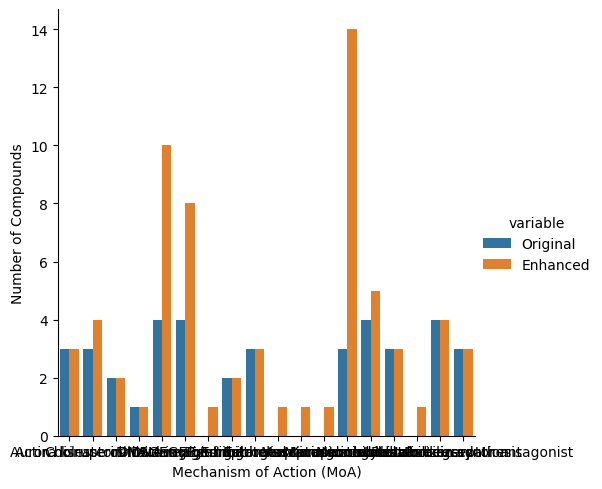

In [86]:
g = sns.catplot(data=df_compound_count, x="MoA", y="value", hue="variable", kind="bar")
g.set_axis_labels("Mechanism of Action (MoA)", "Number of Compounds")